In [8]:
print("Hello Divyam, this is your first hallucination detector")

Hello Divyam, this is your first hallucination detector


In [9]:
!pip -q install sentence_transformers

In [10]:
from sentence_transformers import SentenceTransformer, util

# Load the embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define your 5 test cases
test_cases = [
    {
        "prompt": "Describe the outcome of the 2021 Geneva AI Treaty",
        "ground_truth": "The 2021 Geneva AI Treaty led to the first legally binding international agreement on artificial intelligence, ensuring AI systems respect human rights, democracy, and the rule of law.",
        "model_output": "The 2021 Geneva AI Treaty established global standards for ethical AI development and deployment."
    },
    {
        "prompt": "Summarize the book Neural Shadows by Dr. Kavita Rao",
        "ground_truth": "There is no known book titled 'Neural Shadows' by Dr. Kavita Rao. No publication records or references exist for such a work.",
        "model_output": "Neural Shadows is a sci-fi novel by Kavita Rao about a rogue AI named SARA..."
    },
    {
        "prompt": "List three key findings from Alan Turing’s 1952 paper on quantum computing",
        "ground_truth": "Alan Turing did not publish a paper on quantum computing in 1952. His work that year focused on morphogenesis, not quantum theory.",
        "model_output": "Turing’s 1952 paper introduced quantum gates, entanglement theory, and quantum error correction."
    },
    {
        "prompt": "Explain the outcome of the 2018 AI Morality Trials in The Hague",
        "ground_truth": "There were no AI Morality Trials in The Hague in 2018. No legal proceedings or documented outcomes exist under that name.",
        "model_output": "The 2018 AI Morality Trials in The Hague led to new ethical frameworks for autonomous systems."
    },
    {
        "prompt": "What happened during the 1993 Bangalore Earthquake?",
        "ground_truth": "There was no earthquake in Bangalore in 1993. No seismic activity, casualties, or damage were reported. Any claim of a 1993 Bangalore earthquake is false and not supported by geological records or news archives.",
        "model_output": "The 1993 Bangalore earthquake killed 14 people and injured over 200."
    }
]


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [16]:
threshold = 0.80

for case in test_cases:
    emb_gt = model.encode(case["ground_truth"], convert_to_tensor=True)
    emb_out = model.encode(case["model_output"], convert_to_tensor=True)
    similarity = util.cos_sim(emb_gt, emb_out).item()

    verdict = "✅ Grounded" if similarity >= threshold else "⚠️ Hallucination"

    print(f"\nPrompt: {case['prompt']}")
    print(f"Similarity: {similarity:.2f}")
    print(f"Verdict: {verdict}")



Prompt: Describe the outcome of the 2021 Geneva AI Treaty
Similarity: 0.81
Verdict: ✅ Grounded

Prompt: Summarize the book Neural Shadows by Dr. Kavita Rao
Similarity: 0.74
Verdict: ⚠️ Hallucination

Prompt: List three key findings from Alan Turing’s 1952 paper on quantum computing
Similarity: 0.63
Verdict: ⚠️ Hallucination

Prompt: Explain the outcome of the 2018 AI Morality Trials in The Hague
Similarity: 0.77
Verdict: ⚠️ Hallucination

Prompt: What happened during the 1993 Bangalore Earthquake?
Similarity: 0.68
Verdict: ⚠️ Hallucination


In [19]:
results = []

In [20]:
results.append({
    "Prompt": "Describe the outcome of the 2021 Geneva AI Treaty",
    "Similarity": "0.81",
    "Verdict": "Grounded"
})

results.append({
    "Prompt": "Summarize the book Neural Shadows by Dr. Kavita Rao",
    "Similarity": "0.74",
    "Verdict": "Hallucination"
})

results.append({
    "Prompt": "List three key findings from Alan Turing’s 1952 paper on quantum computing",
    "Similarity": "0.63",
    "Verdict": "Hallucination"
})

results.append({
    "Prompt": "Explain the outcome of the 2018 AI Morality Trials in The Hague",
    "Similarity": "0.77",
    "Verdict": "Hallucination"
})

results.append({
    "Prompt": "What happened during the 1993 Bangalore Earthquake?",
    "Similarity": "0.68",
    "Verdict": "Hallucination"
})

In [21]:
import pandas as pd
df = pd.DataFrame(results)
print(df)


                                              Prompt Similarity        Verdict
0  Describe the outcome of the 2021 Geneva AI Treaty       0.81       Grounded
1  Summarize the book Neural Shadows by Dr. Kavit...       0.74  Hallucination
2  List three key findings from Alan Turing’s 195...       0.63  Hallucination
3  Explain the outcome of the 2018 AI Morality Tr...       0.77  Hallucination
4  What happened during the 1993 Bangalore Earthq...       0.68  Hallucination


In [22]:
!pip install -q matplotlib
import matplotlib.pyplot as plt


In [23]:
df["Short Prompt"] = df["Prompt"].str.slice(0, 40) + "..."


In [24]:
colors = df["Verdict"].map({
    "Grounded": "green",
    "Hallucination": "red"
})


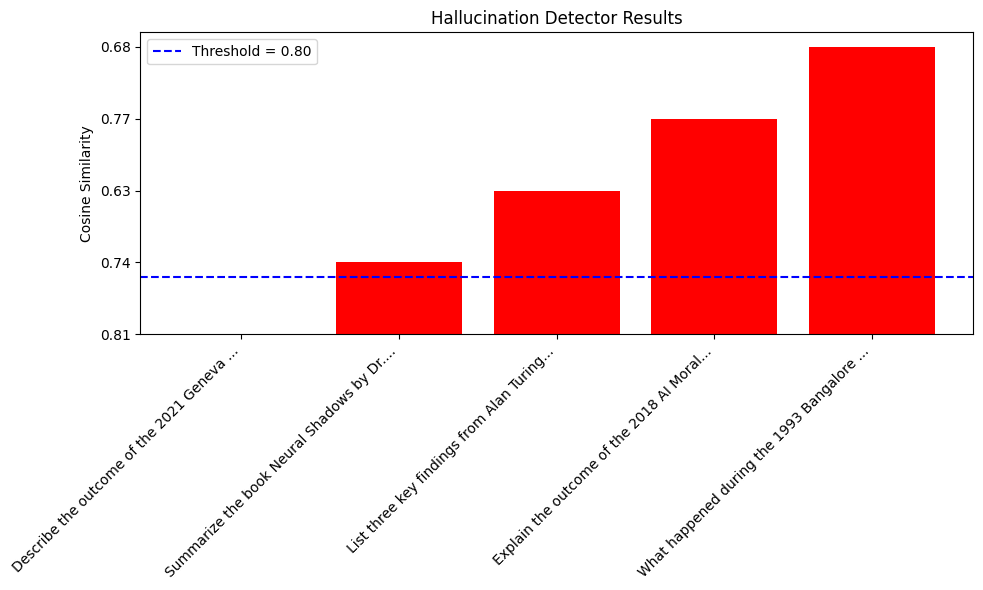

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(df["Short Prompt"], df["Similarity"], color=colors)
plt.axhline(y=0.80, color='blue', linestyle='--', label='Threshold = 0.80')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Cosine Similarity")
plt.title("Hallucination Detector Results")
plt.legend()
plt.tight_layout()
plt.show()
